<a href="https://colab.research.google.com/github/ulvaan2106/AIML-2025/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/loan_data.csv')
df.shape

(9578, 14)

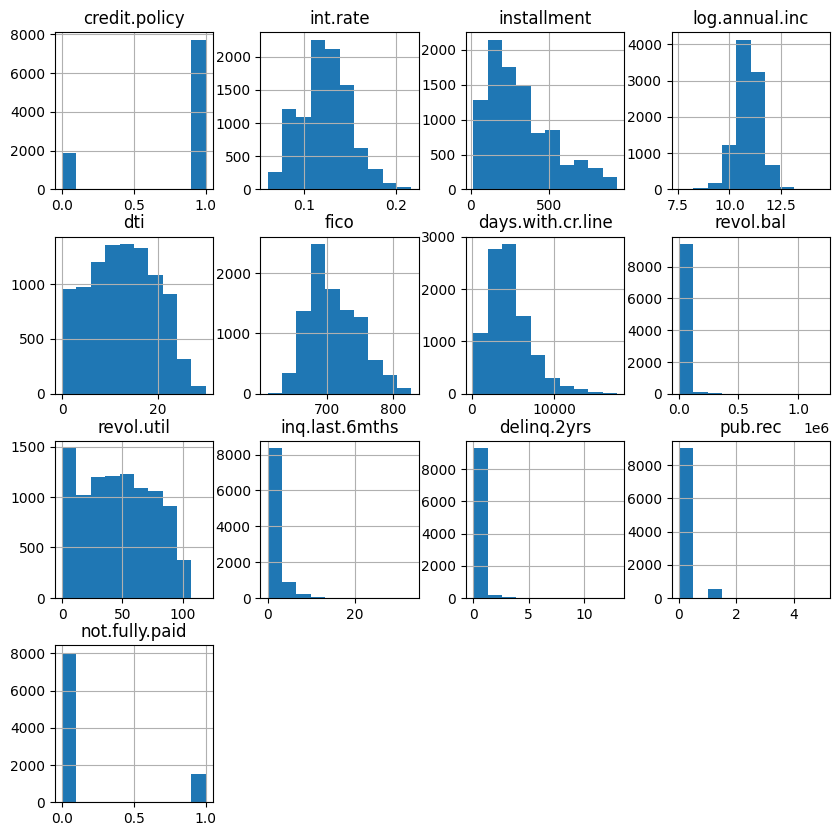

In [4]:
df.hist(figsize=(10,10))
plt.hist(df['int.rate'],bins=100)
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [8]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
print("Breakup of credit approval status.\n1 means approved credit,\n0 means not approved.")
print(df['credit.policy'].value_counts())

Breakup of credit approval status.
1 means approved credit,
0 means not approved.
credit.policy
1    7710
0    1868
Name: count, dtype: int64


In [10]:
print(f"Top 5 criteria for loan Approval:\n{df ['purpose'].value_counts()}")

Top 5 criteria for loan Approval:
purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64


In [11]:
print(f"Top 5 Int.Rates for Loan Approval:\n{df ['int.rate'].value_counts()}")

Top 5 Int.Rates for Loan Approval:
int.rate
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: count, Length: 249, dtype: int64


In [12]:
print(f"Top 5 FICO scores for Loan Approval:\n{df ['fico'].value_counts()}")

Top 5 FICO scores for Loan Approval:
fico
687    548
682    536
692    498
697    476
702    472
707    444
667    438
677    427
717    424
662    414
712    395
672    395
722    388
727    361
732    330
742    324
737    313
752    258
747    236
757    231
762    220
772    158
767    142
777    140
652    131
657    127
782    118
647    112
642    102
792     97
787     85
797     76
802     55
807     45
812     33
632      6
817      6
822      5
637      5
627      2
612      2
827      1
617      1
622      1
Name: count, dtype: int64


In [13]:
print(f"Top Maximum installments for Loan Approval:\n{df ['installment'].value_counts()}")

Top Maximum installments for Loan Approval:
installment
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: count, Length: 4788, dtype: int64


<Figure size 1000x600 with 0 Axes>

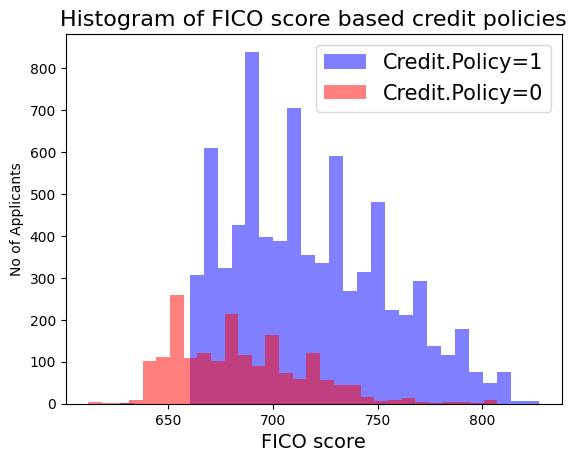

<Figure size 1000x600 with 0 Axes>

In [14]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue',label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5,color='red',label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title("Histogram of FICO score based credit policies",fontsize=16)
plt.xlabel("FICO score",fontsize=14)
plt.ylabel("No of Applicants")
plt.figure(figsize=(10,6))

In [15]:
df_final = pd.get_dummies(df,['purpose'],drop_first=True)

In [16]:
df.shape, df_final.shape, df_final.columns[14:]

((9578, 14),
 (9578, 19),
 Index(['purpose_debt_consolidation', 'purpose_educational',
        'purpose_home_improvement', 'purpose_major_purchase',
        'purpose_small_business'],
       dtype='object'))

In [17]:
from sklearn.model_selection import train_test_split
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [18]:
df_final.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9578, 19), (7662, 18), (1916, 18), (7662,), (1916,))

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier(criterion='log_loss',max_depth=None)

In [21]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss')

In [22]:
train_pred = dtree.predict(X_train)
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [24]:
print(f"Accuracy of Train:{accuracy_score(y_train,train_pred)}")
print(f"Accuracy of Test:{accuracy_score(y_test,predictions)}")

Accuracy of Train:1.0
Accuracy of Test:0.7249478079331941


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=1000)